# Q2

The clamp assembly as shown in Figure Q2 consists of member AB and AC, which are pin connected at A. The clamp works by rotating a single start ACME thread (∝=14.5°) with the size of 12.5 mm and pitch of 2.5 mm. At this instant, the compressive force, Fc on the wood between B and C is 180 N. The collar at the assembly has a mean diameter of 13.5 mm. Assume all the friction coefficient between all surface contracts is 0.3.
Determine:

i) the load acting at the screw.

ii) the torque required to tighten the screw.

iii) the maximum compressive force, Fc, if allowable normal stress at the screw is 10 MPa.

In [2]:
# Required
from math import sin, cos, tan, pi, atan, degrees, radians
from matplotlib import pyplot as plt
import numpy as np

In [3]:
screw_type = 1 # single-start
alpha = 14.5
d_outer = 12.5
pitch = 2.5
Fc = 180
d_collar = 13.5
f_screw = 0.3
f_collar = 0.3

i) the load acting at the screw.

$$+\circlearrowleft \sum M_A=0$$
$$F_E(30)+F_B(70)=0$$
$$F_E(30)+(180)(70)=0$$

In [4]:
F_e = 180*70/30
print(f'E = {F_e}')

E = 420.0


Load acting at the screw = $F_E = 420 N$

ii) the torque required to tighten the screw.

$$T_u = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n + f\tan\lambda} + \frac{Wf_c d_c}{2}$$

Find helix angle, 
$$ \tan\lambda = \frac{L}{\pi d_m} $$

Find lead first,
$$Lead, L=np$$

$L=(1)(2.5)$

In [5]:
Lead = screw_type*pitch
print(f'Lead={Lead}')

Lead=2.5


Find mean diameter, $d_m = \frac {D+(D-p)}{2}$

$d_m = \frac {12.5+(12.5-2.5)}{2}$

In [6]:
d_inner = d_outer-pitch
d_mean = (d_outer+d_inner)/2

print(f'Mean diameter={d_mean}mm')


Mean diameter=11.25mm


From equation
$$ \tan\lambda = \frac{L}{\pi d_m} $$

In [7]:
tan_lambda = Lead/(pi*d_mean)
print(f'tan(lambda)={tan_lambda}')
lambda_helix = degrees(atan(tan_lambda))
print(f'Lambda = {lambda_helix}')

tan(lambda)=0.07073553026306459
Lambda = 4.046108071701114


From equation
$$\tan\alpha_n=\cos\lambda \tan \alpha$$

In [8]:
alpha_n = degrees(atan(cos(radians(lambda_helix))*tan(radians(alpha))))
print(f'alpha_n = {alpha_n}')

alpha_n = 14.465378101066173


Insert to torque to lift the load equation
$$T_u = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n - f\tan\lambda} + \frac{Wf_c d_c}{2}$$

In [9]:
d_mean=d_mean/1000
d_collar=d_collar/1000
T_u =(F_e*d_mean/2)*((f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix)))))+(F_e*f_collar*d_collar/2)
print(f'T_u={T_u:.2f}N')

T_u=1.77N


iii) the maximum compressive force, Fc, if allowable normal stress at the screw is 10 MPa.

$$\sigma = \frac{F_E}{\frac {\pi d^2_{r}}{4}}$$

$$10\times 10^6 = \frac{F_E}{\frac {\pi (0.010)^2}{4}}$$

In [10]:
F_e = 10E+6*pi*pow(d_inner/1000,2)/4
print(f'E = {F_e:.3f}N')

E = 785.398N


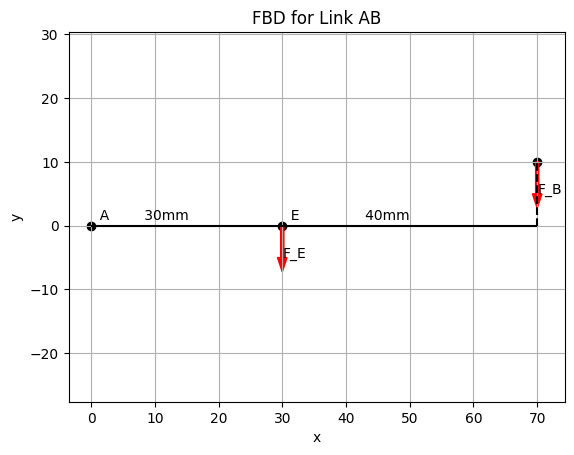

In [14]:
# FBD for Link AB

coorA = [0,0]
coorB = [30,0]
coorC = [70,10]

data = np.array([coorA,coorB,coorC])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(coorB[0],coorB[1], 0,-5,width=0.5,color='r')
ax.vlines(coorC[0],0,coorC[1], color='k', linestyles='dashed')
ax.arrow(coorC[0],coorC[1], 0,-5,width=0.5,color='r')
ax.hlines(0,0,70, color='k')

ax.set(xlabel='x', ylabel='y',
       title='FBD for Link AB')

ax.text(coorB[0],coorB[1]-5,f'F_E')
ax.text(coorC[0],coorC[1]-5,f'F_B')
ax.text(coorA[0],coorA[1]+1,f'  A        30mm')
ax.text(coorB[0],coorB[1]+1,f'  E               40mm')

plt.axis('equal')
plt.show()

Calculate the force at B when force at E changed
$$+\circlearrowleft \sum M_A=0$$
$$F_E'(30)+F_B'(70)=0$$
$$(785.398)(30)+F_B'(70)=0$$

In [12]:
F_b = F_e*30/70
print(f'Force at C = Force at B = {F_b:.3f}N')

Force at C = Force at B = 336.599N
